### EDA
Ahmad's EDA notebook

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.model_selection import train_test_split, cross_validate,GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn import metrics
from sklearn.metrics import recall_score,accuracy_score,plot_confusion_matrix
from sklearn.metrics import RocCurveDisplay,confusion_matrix
from sklearn.preprocessing import OneHotEncoder,StandardScaler,OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import time
#from sklearn.model_selection import GridSearchCV
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import cross_validate

%matplotlib inline

In [3]:
features = pd.read_csv('data/4910797b-ee55-40a7-8668-10efd5c1b960.csv')
features.head()


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
target = pd.read_csv('data/0bf8bc6e-30d0-4c50-956a-603fc693d966.csv')
target.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [7]:
# not using this data
#X_test = pd.read_csv('data/702ddfc5-68cd-4d1d-a0de-f5f566f76d91.csv')


In [5]:
combined_df = pd.concat([features,target['status_group']],axis=1)
combined_df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional


In [6]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [7]:
# check for NAN
combined_df.isna().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [8]:
# check for blank entries
combined_df[(combined_df == '') | (combined_df == ' ')].sum()

id                       0.0
amount_tsh               0.0
date_recorded            0.0
funder                   0.0
gps_height               0.0
installer                0.0
longitude                0.0
latitude                 0.0
wpt_name                 0.0
num_private              0.0
basin                    0.0
subvillage               0.0
region                   0.0
region_code              0.0
district_code            0.0
lga                      0.0
ward                     0.0
population               0.0
public_meeting           0.0
recorded_by              0.0
scheme_management        0.0
scheme_name              0.0
permit                   0.0
construction_year        0.0
extraction_type          0.0
extraction_type_group    0.0
extraction_type_class    0.0
management               0.0
management_group         0.0
payment                  0.0
payment_type             0.0
water_quality            0.0
quality_group            0.0
quantity                 0.0
quantity_group

In [8]:
combined_df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


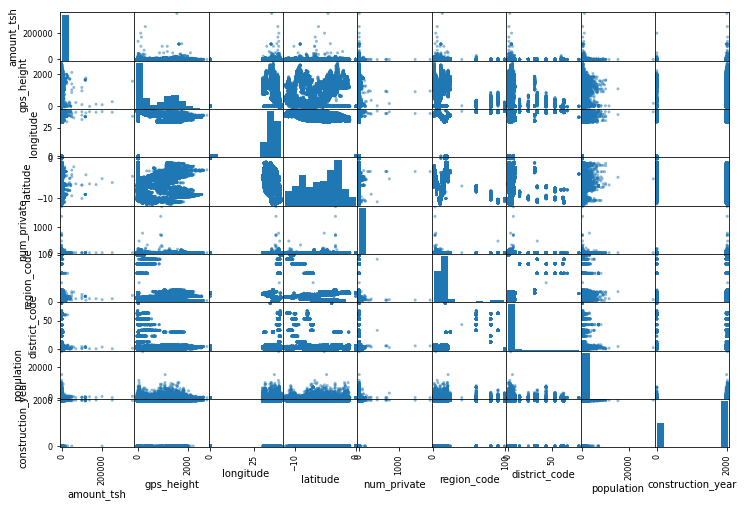

In [10]:
# Check plot matrix for numeric columns
numeric_features = combined_df.select_dtypes(include=['int64','float64'])                                            
numeric_cols_names = list(numeric_features.columns)
numeric_cols_names.pop(0)
pd.plotting.scatter_matrix(combined_df[numeric_cols_names],figsize=(12,8));

In [7]:
# split categorical features for from numerical
categorical_features = combined_df.select_dtypes(include=['object'])
numerical_features = combined_df.select_dtypes(include=['int64','float64'])

In [10]:
print('===== Categorical EDA ===='*3)

===== Categorical EDA ========= Categorical EDA ========= Categorical EDA ====


In [8]:
# Select which categorical features to include
categorical_columns = list(categorical_features.columns)
print(categorical_columns)
print(len(categorical_columns))

['date_recorded', 'funder', 'installer', 'wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by', 'scheme_management', 'scheme_name', 'permit', 'extraction_type', 'extraction_type_group', 'extraction_type_class', 'management', 'management_group', 'payment', 'payment_type', 'water_quality', 'quality_group', 'quantity', 'quantity_group', 'source', 'source_type', 'source_class', 'waterpoint_type', 'waterpoint_type_group', 'status_group']
31


In [9]:
# inluded source)type instead source_class?
# Go through each categorical column and decide which ones to include for
# analysis

num = 30
print(categorical_columns[num])
print(categorical_features[categorical_columns[num]].value_counts())

possible_cat_features_include = ['date_recorded','basin','region','public_meeting',
                          'scheme_management',
                   'permit','extraction_type','extraction_type_group',
                   'extraction_type_class','management','management_group',
                   'payment','payment_type','water_quality','quality_group',
                   'quantity','quantity_group','source','source_type','source_class',
                   'waterpoint_type','waterpoint_type_group','status_group']


cat_features_exclude = ['funder','installer','wpt_name','subvillage','lga','ward',
                   'recorded_by','scheme_name']


num_nans = categorical_features[categorical_columns[num]].isna().sum()
print('='*40)
print(f'Number of NaN for {categorical_columns[num]}: {num_nans}')

status_group
functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64
Number of NaN for status_group: 0


In [155]:
# compare the following categorical features to if they have the same information
# 'extraction_type','extraction_type_group','extraction_type_class'
# ==> use extraction_type and drop 'extraction_type_group'and 'extraction_type_class'

a = combined_df['extraction_type'].value_counts()
b = combined_df['extraction_type_group'].value_counts()
c = combined_df['extraction_type_class'].value_counts()
print(a,b,c)
print('='*80)

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64 gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: ext

In [156]:
# Compare 'management'and 'management_group' columns 

print(combined_df['management'].value_counts())
print(combined_df['management_group'].value_counts())
print('='*80)

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64
user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64


In [157]:
# Compare 'payment' and 'payment_type' columns
# ==> use 'payment_type' and drop 'payment'

print(combined_df['payment'].value_counts())
print(combined_df['payment_type'].value_counts())
print('='*80)

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64
never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64


In [17]:
# Compare 'water_quality' and 'quality_group'
# ==> use water quality and drop quality_group

print(combined_df['water_quality'].value_counts())
print(combined_df['quality_group'].value_counts())
print('='*80)

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64
good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


In [18]:
# Compare 'quantity' and 'quantity_group'
# ==> use quantity and drop quantity_group

print(combined_df['quantity'].value_counts())
print(combined_df['quantity_group'].value_counts())
print('='*80)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64
enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,status_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe,functional
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,non functional
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,Germany Republi,1210,CES,37.169807,-3.253847,Area Three Namba 27,0,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,functional
59396,27263,4700.0,2011-05-07,Cefa-njombe,1212,Cefa,35.249991,-9.070629,Kwa Yahona Kuvala,0,...,soft,good,enough,enough,river,river/lake,surface,communal standpipe,communal standpipe,functional
59397,37057,0.0,2011-04-11,NaN,0,NaN,34.017087,-8.750434,Mashine,0,...,fluoride,fluoride,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump,functional
59398,31282,0.0,2011-03-08,Malec,0,Musa,35.861315,-6.378573,Mshoro,0,...,soft,good,insufficient,insufficient,shallow well,shallow well,groundwater,hand pump,hand pump,functional


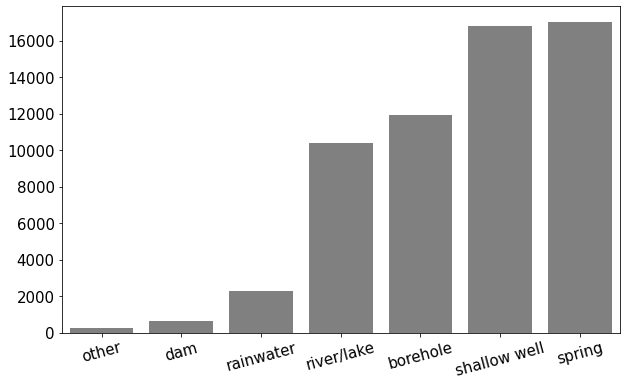

In [12]:
# Compare 'source','source_type' and 'source_class'
# ==> keep 'source' and 'source_class' and drop 'source_type'

#print(combined_df['source'].value_counts())
#print(combined_df['source_type'].value_counts())
#print(combined_df['source_class'].value_counts())


In [159]:
a = combined_df[combined_df['construction_year'] < 2002]
b = len(a)/len(combined_df)*100
b

69.93265993265993

In [11]:
# Compare 'waterpoint_type'and 'waterpoint_type_group'
# Keep water_type and drop the other

print(combined_df['waterpoint_type'].value_counts())
print(combined_df['waterpoint_type_group'].value_counts())
print('='*40)

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64
communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


In [31]:
print('======= End of Categorical EDA ======='*2)

======= End of Categorical EDA ============== End of Categorical EDA =======


In [32]:
print('=========== Numerical EDA ============' * 2)


=========== Numerical EDA ======================= Numerical EDA ============


In [161]:
# Check numerical colums
numerical_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 59400 non-null  int64  
 1   amount_tsh         59400 non-null  float64
 2   gps_height         59400 non-null  int64  
 3   longitude          59400 non-null  float64
 4   latitude           59400 non-null  float64
 5   num_private        59400 non-null  int64  
 6   region_code        59400 non-null  int64  
 7   district_code      59400 non-null  int64  
 8   population         59400 non-null  int64  
 9   construction_year  59400 non-null  int64  
dtypes: float64(3), int64(7)
memory usage: 4.5 MB


In [162]:
numerical_features.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,59400.000000,59400.000000,59400.000000,59400.000000,5.940000e+04,59400.000000,59400.000000,59400.000000,59400.000000,59400.000000
mean,37115.131768,317.650385,668.297239,34.077427,-5.706033e+00,0.474141,15.297003,5.629747,179.909983,1300.652475
std,21453.128371,2997.574558,693.116350,6.567432,2.946019e+00,12.236230,17.587406,9.633649,471.482176,951.620547
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18519.750000,0.000000,0.000000,33.090347,-8.540621e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37061.500000,0.000000,369.000000,34.908743,-5.021597e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55656.500000,20.000000,1319.250000,37.178387,-3.326156e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74247.000000,350000.000000,2770.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [20]:
# id
# ==> drop this column 'id'


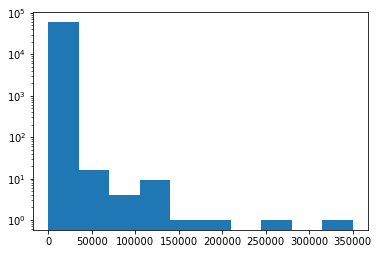

In [24]:
# amount_tsh
plt.hist(data=numerical_features, x='amount_tsh',bins=10,log=True);

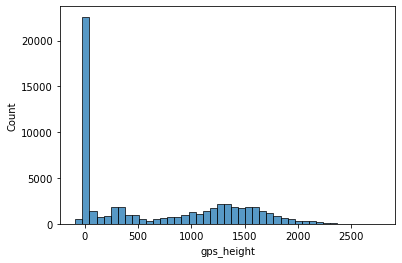

In [25]:
# gps_height
sns.histplot(data=numerical_features, x='gps_height');

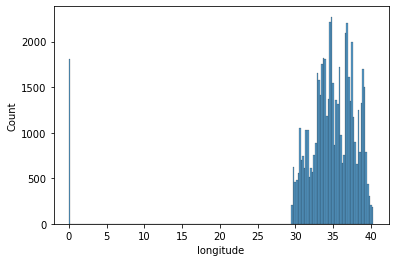

In [27]:
# longitude
sns.histplot(data=numerical_features, x='longitude');

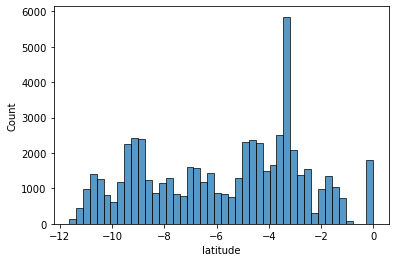

In [28]:
# latitude
sns.histplot(data=numerical_features, x='latitude');

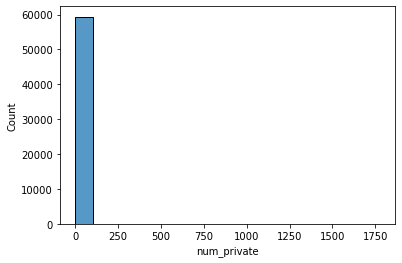

In [31]:
# 'num_private'
# ==> drop 'num_private'

sns.histplot(data=numerical_features, x='num_private');

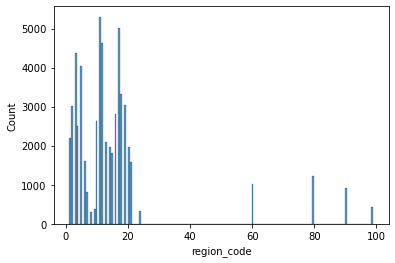

In [27]:
# region_code
sns.histplot(data=numerical_features, x='region_code');

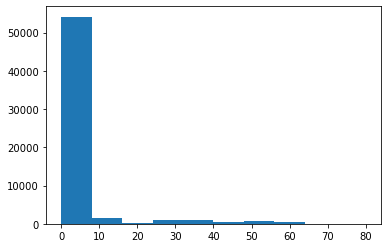

In [44]:
#district_code
#sns.histplot(data=numerical_features, x='district_code')
plt.hist(data=numerical_features, x='district_code');

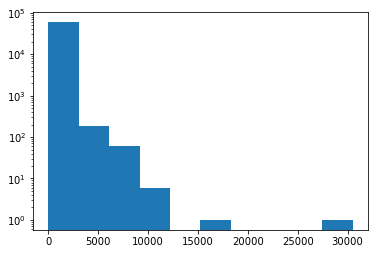

In [46]:
# population
#sns.histplot(data=numerical_features, x='population')
plt.hist(data=numerical_features, x='population',log=True);

<AxesSubplot:xlabel='construction_year', ylabel='Count'>

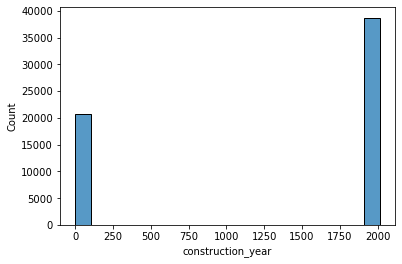

In [31]:
# construction_year
# ==> construction year has a lot of zeros, need to fix construction_year 

sns.histplot(data=numerical_features, x='construction_year',bins=20)

In [48]:
print('========End of Numerical features EDA ====================================')

========End of Numerical features EDA ====================================


In [17]:
# Include the following categorical and numerical features based on EDA
# 'extraction_type_group'and 'extraction_type_class'
cols_to_drop = ['extraction_type_group', 'extraction_type_class', 'payment', 
                'quality_group', 'quantity_group', 
                'waterpoint_type_group','funder','installer','wpt_name',
                'subvillage','lga','ward','recorded_by','scheme_name','id', 
                'num_private']

keep_columns = [col for col in combined_df.columns if(col not in cols_to_drop)]

combined_final_df = combined_df[keep_columns].copy()

#combined_final_df['date_recorded'].value_counts()[140:]
#combined_final_df[combined_final_df['date_recorded'].str.match('2014')]
a = sorted(combined_final_df['construction_year'])
combined_final_df


,amount_tsh,date_recorded,gps_height,longitude,latitude,basin,region,region_code,district_code,population,...,management,management_group,payment_type,water_quality,quantity,source,source_type,source_class,waterpoint_type,status_group
0,6000.0,2011-03-14,1390,34.938093,-9.856322,Lake Nyasa,Iringa,11,5,109,...,vwc,user-group,annually,soft,enough,spring,spring,groundwater,communal standpipe,functional
1,0.0,2013-03-06,1399,34.698766,-2.147466,Lake Victoria,Mara,20,2,280,...,wug,user-group,never pay,soft,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
2,25.0,2013-02-25,686,37.460664,-3.821329,Pangani,Manyara,21,4,250,...,vwc,user-group,per bucket,soft,enough,dam,dam,surface,communal standpipe multiple,functional
3,0.0,2013-01-28,263,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,63,58,...,vwc,user-group,never pay,soft,dry,machine dbh,borehole,groundwater,communal standpipe multiple,non functional
4,0.0,2011-07-13,0,31.130847,-1.825359,Lake Victoria,Kagera,18,1,0,...,other,other,never pay,soft,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10.0,2013-05-03,1210,37.169807,-3.253847,Pangani,Kilimanjaro,3,5,125,...,water board,user-group,per bucket,soft,enough,spring,spring,groundwater,communal standpipe,functional
59396,4700.0,2011-05-07,1212,35.249991,-9.070629,Rufiji,Iringa,11,4,56,...,vwc,user-group,annually,soft,enough,river,river/lake,surface,communal standpipe,functional
59397,0.0,2011-04-11,0,34.017087,-8.750434,Rufiji,Mbeya,12,7,0,...,vwc,user-group,monthly,fluoride,enough,machine dbh,borehole,groundwater,hand pump,functional
59398,0.0,2011-03-08,0,35.861315,-6.378573,Rufiji,Dodoma,1,4,0,...,vwc,user-group,never pay,soft,insufficient,shallow well,shallow well,groundwater,hand pump,functional


construction year greater 0:  0.6513636363636364
construction year = 0: 0.34863636363636363


4771.0

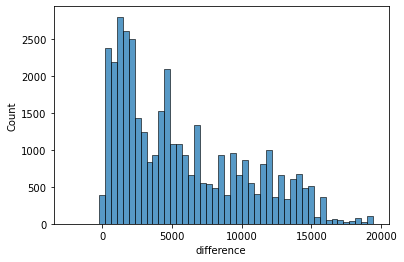

In [18]:
# Calculate difference construction year and date_recorded for those
# columns with entries that not NAN or zero
date_df = combined_final_df[['date_recorded','construction_year']].copy()
date_df['rev_construction_year'] = date_df[
    'construction_year'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)

date_df['rev_date_recorded'] = date_df[
    'date_recorded'].map(lambda x: pd.to_datetime(x).toordinal())
above_zero = date_df[date_df['construction_year'] > 0].copy()
print('construction year greater 0: ', len(above_zero)/len(date_df))
print('construction year = 0:',date_df['rev_construction_year'].isna().sum()/len(date_df))
above_zero['difference'] = above_zero['rev_date_recorded'] - above_zero['rev_construction_year']
sns.histplot(data=above_zero,x='difference');
difference = above_zero['rev_date_recorded'].median() - above_zero['rev_construction_year'].median()
difference

In [19]:
# Create a new column 'rev_date_recorded' and change date_recorded to ordinal
combined_final_df['rev_date_recorded'] = combined_final_df[
    'date_recorded'].map(lambda x: pd.to_datetime(x).toordinal())

# Create a new column 'rev_construction_year' and if year greater than zero 
# change to ordinal and if equal to zero change to NAN
combined_final_df['rev_construction_year'] = combined_final_df[
    'construction_year'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)

# If value for 'rev_construction_year' is NAN, approximate construction by
# by substructing difference (calculated in above cell) from 'rev_date_recorded
combined_final_df.rev_construction_year.fillna(
    value=(combined_final_df.rev_date_recorded - difference),inplace=True)

combined_final_df[['date_recorded','rev_date_recorded',
                   'construction_year','rev_construction_year']]


,date_recorded,rev_date_recorded,construction_year,rev_construction_year
0,2011-03-14,734210,1999,729755.0
1,2013-03-06,734933,2010,733773.0
2,2013-02-25,734924,2009,733408.0
3,2013-01-28,734896,1986,725007.0
4,2011-07-13,734331,0,729560.0
...,...,...,...,...
59395,2013-05-03,734991,1999,729755.0
59396,2011-05-07,734264,1996,728659.0
59397,2011-04-11,734238,0,729467.0
59398,2011-03-08,734204,0,729433.0


In [20]:
# reate a 'rev_status' colum, assign 0 if 'status_group' equals functional
# and assign 1 if 'status_grou' eqauls not functional or functional needs repair 
combined_final_df['rev_status'] = combined_final_df['status_group'].map(lambda x: 0 if(x == 'functional') else 1)
combined_final_df['rev_status'].value_counts(normalize=True)

0    0.543081
1    0.456919
Name: rev_status, dtype: float64

In [90]:
temp = combined_final_df.groupby(['source_type'])['source_type'].count().to_frame()
temp.rename(columns={'source_type':'value'},inplace=True)
temp.sort_values(by='value',inplace=True,ascending=False)
print(temp)
water_source_names = temp.index
water_source_names

                      value
source_type                
spring                17021
shallow well          16824
borehole              11949
river/lake            10377
rainwater harvesting   2295
dam                     656
other                   278


Index(['spring', 'shallow well', 'borehole', 'river/lake',
       'rainwater harvesting', 'dam', 'other'],
      dtype='object', name='source_type')

In [102]:
water_source = combined_final_df.groupby(['source_type','rev_status'])['source_type'].count().to_frame()
water_source.rename(columns={'source_type' : 'value'},inplace=True)
row_sequence = []
print(water_source.index)
print('='*40)
for val in water_source_names:
    row_sequence.append((val,0))
    row_sequence.append((val,1))

water_source.reindex(row_sequence)
print(water_source.index)

#x_labels = ['other', 'dam', 'rainwater', 'river/lake', 'borehole',
#       'shallow well', 'spring']
#fig,ax = plt.subplots(figsize=(10,6))

#source = sns.barplot(data=water_source,x=x_labels,y='value')
#source.set_xlabel('Water Source',size=20)
#source.set_ylabel('')
#source.tick_params(labelsize=15)
#source.set_xticklabels(rotation=15,labels=x_labels);

#combined_final_df['rev_status']

MultiIndex([(            'borehole', 0),
            (            'borehole', 1),
            (                 'dam', 0),
            (                 'dam', 1),
            (               'other', 0),
            (               'other', 1),
            ('rainwater harvesting', 0),
            ('rainwater harvesting', 1),
            (          'river/lake', 0),
            (          'river/lake', 1),
            (        'shallow well', 0),
            (        'shallow well', 1),
            (              'spring', 0),
            (              'spring', 1)],
           names=['source_type', 'rev_status'])
MultiIndex([(            'borehole', 0),
            (            'borehole', 1),
            (                 'dam', 0),
            (                 'dam', 1),
            (               'other', 0),
            (               'other', 1),
            ('rainwater harvesting', 0),
            ('rainwater harvesting', 1),
            (          'river/lake', 0),
        

In [31]:
# Drop redundent columns 'construction_year', 'status_groups' and date_recorded
# split dataframe into features and target copies
final_features = combined_final_df.drop(['construction_year','status_group',
                                   'rev_status','date_recorded'],axis=1).copy()
final_target = combined_final_df['rev_status'].copy()
final_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             59400 non-null  float64
 1   gps_height             59400 non-null  int64  
 2   longitude              59400 non-null  float64
 3   latitude               59400 non-null  float64
 4   basin                  59400 non-null  object 
 5   region                 59400 non-null  object 
 6   region_code            59400 non-null  int64  
 7   district_code          59400 non-null  int64  
 8   population             59400 non-null  int64  
 9   public_meeting         56066 non-null  object 
 10  scheme_management      55523 non-null  object 
 11  permit                 56344 non-null  object 
 12  extraction_type        59400 non-null  object 
 13  management             59400 non-null  object 
 14  management_group       59400 non-null  object 
 15  pa

In [41]:
# Split final_features and final_target for train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_features,
                                                   final_target,
                                                   random_state=1234,
                                                   stratify=final_target)

In [42]:
print(y_train.value_counts(normalize=True))
print(y_test.value_counts(normalize=True))

0    0.543075
1    0.456925
Name: rev_status, dtype: float64
0    0.543098
1    0.456902
Name: rev_status, dtype: float64


In [43]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   longitude              44550 non-null  float64
 3   latitude               44550 non-null  float64
 4   basin                  44550 non-null  object 
 5   region                 44550 non-null  object 
 6   region_code            44550 non-null  int64  
 7   district_code          44550 non-null  int64  
 8   population             44550 non-null  int64  
 9   public_meeting         42074 non-null  object 
 10  scheme_management      41631 non-null  object 
 11  permit                 42277 non-null  object 
 12  extraction_type        44550 non-null  object 
 13  management             44550 non-null  object 
 14  management_group       44550 non-null  object 
 15

In [44]:
# Create X_trian for numerical features

X_train_nums = X_train.select_dtypes(['float64','int64'])
X_train_nums.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   amount_tsh             44550 non-null  float64
 1   gps_height             44550 non-null  int64  
 2   longitude              44550 non-null  float64
 3   latitude               44550 non-null  float64
 4   region_code            44550 non-null  int64  
 5   district_code          44550 non-null  int64  
 6   population             44550 non-null  int64  
 7   rev_date_recorded      44550 non-null  int64  
 8   rev_construction_year  44550 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 3.4 MB


In [19]:
X_train_num_loc = X_train_nums[['longitude','latitude','population']].copy()
X_test_num_loc = X_test[['longitude','latitude','population']].copy()
X_train_num_all = X_train_nums.copy()
X_test_num_all = X_test.select_dtypes(['float64','int64']).copy()

In [45]:
# Create X_train for categorical features

X_train_cats = X_train.select_dtypes('object')
X_train_cats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44550 entries, 23195 to 45363
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   basin              44550 non-null  object
 1   region             44550 non-null  object
 2   public_meeting     42074 non-null  object
 3   scheme_management  41631 non-null  object
 4   permit             42277 non-null  object
 5   extraction_type    44550 non-null  object
 6   management         44550 non-null  object
 7   management_group   44550 non-null  object
 8   payment_type       44550 non-null  object
 9   water_quality      44550 non-null  object
 10  quantity           44550 non-null  object
 11  source             44550 non-null  object
 12  source_type        44550 non-null  object
 13  source_class       44550 non-null  object
 14  waterpoint_type    44550 non-null  object
dtypes: object(15)
memory usage: 5.4+ MB


In [46]:
# Use this function to plot ROC curve 
def plot_roc_curve(y_train,y_predict,model_name):
    #fig,ax = plt.subplots(figsize=(10,10))
    fpr, tpr, thresholds = metrics.roc_curve(y_train, y_predict)
    roc_auc = metrics.auc(fpr, tpr)
    display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,
                                   estimator_name=model_name)
    display.plot();     

In [47]:
# Setup numerical and categorical pipeline and incorporate both into
# ColumnTransformer
num_pipeline = Pipeline(steps=[
    ('num_impute',SimpleImputer(strategy='mean')),
    ('num_ss',StandardScaler())])

#num2_pipeline = Pipeline(steps=[
#    ('num_impute',SimpleImputer(strategy='median')),
#    ('num_ss',StandardScaler())])

cat_pipeline = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('cat_ohe', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

cat_pipeline2 = Pipeline(steps=[
    ('cat_impute',SimpleImputer(strategy='most_frequent')),
    ('cat_ord',OrdinalEncoder())])

trans = ColumnTransformer(transformers=[
    ('numerical',num_pipeline,X_train_nums.columns),
    ('categorical',cat_pipeline,X_train_cats.columns)])

trans2 = ColumnTransformer(transformers=[
    ('numerical',num_pipeline,X_train_nums.columns),
    ('categorical',cat_pipeline,X_train_cats.columns)])



In [20]:
# Create base model Pipe for DummyClassifier
start = time.time()
base_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('dummy_model',DummyClassifier(strategy='prior'))])

# Specify parameters for DummyClassifier GridSearch and incorpoare base model
# Pipe into GridSearchCV
base_parameters = {
    'dummy_model__random_state': [1234],
    'dummy_model__strategy' : ['prior']
}

base_grid_model = GridSearchCV(estimator = base_model_pipe,
                          param_grid=base_parameters,refit='recall',
                         scoring=['recall','accuracy'])

# Fit train data for base model
base_grid_model.fit(X_train,y_train)


# Incorporate cv_results into pandas dataframe
base_cv_results = pd.DataFrame([base_grid_model.cv_results_])
accuracy = base_cv_results['mean_test_accuracy'].mean()[0]
stop = time.time()
print(f'Time run this DummyClassifier: {stop-start}')
#print(base_cv_results)
#base_y_train_pred = base_grid_model.predict(X_train)
#print('Recall score for training: ',base_grid_model.best_score_)
#print(f'Accuracy score for training samples: ',accuracy)


Time run this DummyClassifier: 32.79390957300001


In [48]:
# Validation metrics
print('='*40)
print(f'Validation recall score: {base_grid_model.best_score_}')
print(f'Validation accuracy score: {accuracy}')
print(f'Best paramets: {base_grid_model.best_params_}')
print('='*40)

# Predict for X_test samples
print('Test sample prediction result for DummyClassifier\n')
base_y_test_pred = base_grid_model.predict(X_test)
recall = recall_score(y_test,base_y_test_pred)
accuracy = accuracy_score(y_test,base_y_test_pred)
print(f'Test recall score: {recall}\nTest accuracy score: {accuracy}')
      
# Plot confusion and ROC curve
print(confusion_matrix(y_test,base_y_test_pred))
plot_confusion_matrix(base_grid_model,X_test,y_test);
plot_roc_curve(y_test,base_y_test_pred,'Dummy Classifier')

NameError: name 'base_grid_model' is not defined

In [49]:
# Create model Pipe for Logistic Regression
start = time.time()
lr_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('lr_model',LogisticRegression())])

# Specify grid parameters for lr_model and incorporate into GridSearch
lr_parameters = {
    'trans__numerical__num_ss__with_mean' : [True],  #tried False
    #'lr_model__penalty' : ['l2','l1','elasticnet'], #too many warnings gets generated
    'lr_model__random_state' : [1234],
    'lr_model__C' : [1e6],  #tried 1e-3,1,10e3 and 10e9
    'lr_model__max_iter' : [1e3],  #tried 1e4
    'lr_model__solver' : ['lbfgs'] #tried also 'liblinear' 
}

lr_grid_model = GridSearchCV(estimator = lr_model_pipe,
                          param_grid=lr_parameters,refit='recall',
                          scoring=['recall','accuracy'])

# Train model with train sample
lr_grid_model.fit(X_train,y_train)
stop = time.time()
print(f'Time to run run this Logistic Classifier grid: {stop-start}')


Time to run run this Logistic Classifier grid: 74.09213209152222


Validation recall score: 0.6357828914952134
Validation accuracy score: 0.7548597081930415
Best paramets: {'lr_model__C': 1000000.0, 'lr_model__max_iter': 1000.0, 'lr_model__random_state': 1234, 'lr_model__solver': 'lbfgs', 'trans__numerical__num_ss__with_mean': True}
Test recall score: 0.6322770817980841
Test accuracy score: 0.7542760942760943
[[6911 1154]
 [2495 4290]]


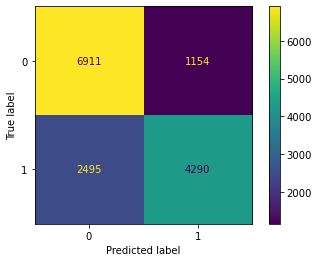

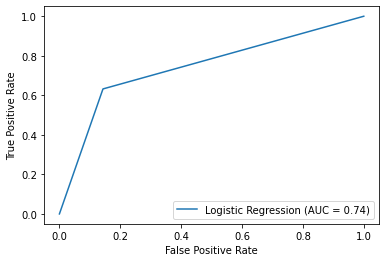

In [50]:
# Incorporate validation results into dataframe
lr_cv_results = pd.DataFrame([lr_grid_model.cv_results_])
lr_accuracy = lr_cv_results['mean_test_accuracy']

# Display validation results
print('='*40)
print(f'Validation recall score: {lr_grid_model.best_score_}')
print(f'Validation accuracy score: {lr_accuracy[0][:].mean()}')
print(f'Best paramets: {lr_grid_model.best_params_}')
print('='*40)

# Prediction for test samples
lr_y_test_pred = lr_grid_model.predict(X_test)
lr_recall = recall_score(y_test,lr_y_test_pred)
lr_accuracy = accuracy_score(y_test,lr_y_test_pred)
print(f'Test recall score: {lr_recall}\nTest accuracy score: {lr_accuracy}')

# Display confusion matrix and ROC curve for test samples
print(confusion_matrix(y_test,lr_y_test_pred))
plot_confusion_matrix(lr_grid_model,X_test,y_test);
plot_roc_curve(y_test,lr_y_test_pred,'Logistic Regression')

#cv_results

In [76]:
features=list(lr_cv_results['params'][0])
num_features = list(lr_grid_model.best_estimator_['lr_model'].coef_[0])
#print(f'Number of features: {features_num}')

sorted(lr_grid_model.best_estimator_['lr_model'].coef_[0])
top_3 = [-4.05182200849451,3.9772085283108862,3.192256119760876]

idx_top_3 = [num_features.index(f) for f in top_3]
idx_top_3


[132, 64, 104]

In [103]:
X_train_nums = X_train.select_dtypes(['float64','int64'])
X_train_cats = X_train.select_dtypes('object')

X_test_nums = X_test.select_dtypes(['float64','int64'])
X_test_cats = X_test.select_dtypes('object')

num_impute = SimpleImputer(strategy='mean')
cat_impute = SimpleImputer(strategy='most_frequent')

X_train_num_imputed = num_impute.fit_transform(X_train_nums)
X_test_num_imputed = num_impute.transform(X_test_nums)

X_train_cat_imputed = cat_impute.fit_transform(X_train_cats)
X_test_cat_imputed = cat_impute.transform(X_test_cats)

ss = StandardScaler(with_mean=True)
ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')


X_train_num_imputed_scaled = ss.fit_transform(X_train_num_imputed)
X_test_num_imputed_scaled = ss.transform(X_test_num_imputed)


X_train_cat_imputed_ohed = ohe.fit_transform(X_train_cat_imputed,)
X_test_cat_imputed_ohed = ohe.transform(X_test_cat_imputed)

X_train_num_mod_df = pd.DataFrame(X_train_num_imputed_scaled,
                                  columns=X_train_nums.columns,
                                 index=X_train_nums.index)

X_train_cat_mod_df = pd.DataFrame(X_train_cat_imputed_ohed,
                                 index=X_train_cats.index)

X_train_num_cat_mod_df = pd.concat([X_train_num_mod_df,X_train_cat_mod_df],axis=1)

lr = LogisticRegression(random_state=1234,C=1e6,max_iter=1e3,solver='lbfgs')
lr.fit(X_train_num_cat_mod_df,y_train)
lr.score(X_train_num_cat_mod_df,y_train)
#print(X_train_num_cat_mod_df.columns)
#a = np.sort(lr.coef_)
coefficients = lr.coef_



(array([], dtype=int64),)

In [126]:
top_three  = [-3.427713806486967,3.3861204923263384,3.195242599525867]
coef = list(coefficients[0])
idx = [coef.index(c) for c in top_three]
idx


[125, 64, 104]

In [142]:
# Create base model Pipe for DecisionTreeClassifier 
start = time.time()
dt_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('dtree_model',DecisionTreeClassifier())])

# Specify parameters for DecisionTreeClassifier GridSearch and incorpoare 
# dtree_model Pipe into GridSearchCV
dt_parameters = {
    'dtree_model__random_state' : [1234],
    'dtree_model__max_depth': [10,60,90],   #tried 3,5,10,30,60(best),90
    'dtree_model__min_impurity_decrease' : [0,0.3],
    'dtree_model__max_features' : ['auto','sqrt']
}

dtree_grid_model = GridSearchCV(estimator = dt_model_pipe,
                          param_grid=dt_parameters,refit='recall',
                         scoring=['recall','accuracy'])

# Fit train data into dtree_grid_model
dtree_grid_model.fit(X_train,y_train)

# Incorporate validation metrics into dataframe
dt_cv_results = pd.DataFrame([dtree_grid_model.cv_results_])
dt_val_accuracy = dt_cv_results['mean_test_accuracy']
#cv_results
stop = time.time()
print(f'Time to run this Decision Tree Classifier {stop-start}.')

NameError: name 'trans' is not defined

In [53]:
# delete this when running dtree fit cell above again
dt_val_accuracy = dt_cv_results['mean_test_accuracy']

Validation recall score: 0.7527016406717888
Validation accuracy score: 0.7745903479236812
Best paramets: {'dtree_model__max_depth': 60, 'dtree_model__max_features': 'auto', 'dtree_model__min_impurity_decrease': 0, 'dtree_model__random_state': 1234}
Test sample prediction result for DecisionTreeClassifier

Test recall score: 0.7574060427413412
Test accuracy score: 0.7806060606060606
[[6453 1612]
 [1646 5139]]


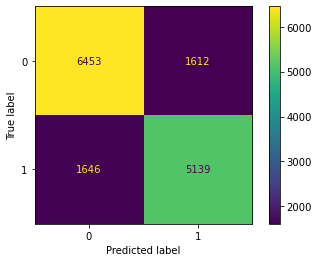

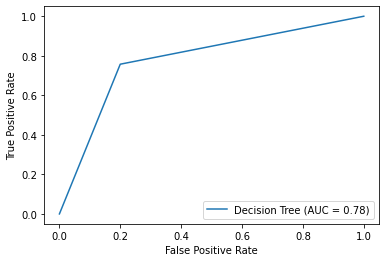

In [54]:
# Print out validation metrics
print('='*40)
print(f'Validation recall score: {dtree_grid_model.best_score_}')
print(f'Validation accuracy score: {dt_val_accuracy[0][:].max()}')
print(f'Best paramets: {dtree_grid_model.best_params_}')
print('='*40)

# Predict for X_test samples
print('Test sample prediction result for DecisionTreeClassifier\n')
dtree_y_test_pred = dtree_grid_model.predict(X_test)
dt_recall = recall_score(y_test,dtree_y_test_pred)
dt_accuracy = accuracy_score(y_test,dtree_y_test_pred)
print(f'Test recall score: {dt_recall}\nTest accuracy score: {dt_accuracy}')

# Plot confusion matrix
print(confusion_matrix(y_test,dtree_y_test_pred))
plot_confusion_matrix(dtree_grid_model,X_test,y_test);
plot_roc_curve(y_test,dtree_y_test_pred,'Decision Tree')

In [23]:
# Create model Pipe for KNeighborsClassifier
start = time.time()
knn_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('knn_model',KNeighborsClassifier())])

# Specify parameters for KNeighborsClassifier GridSearch and incorpoare 
# knn_model Pipe into GridSearchCV
knn_parameters = {
    'knn_model__n_neighbors' : [1,3,15], #tried 3(best),5,10 and 1 may take too long
    'knn_model__weights' : ['uniform','distance'],   #tried ['uniform','distance'] distance(best)
    'knn_model__leaf_size' : [5,15,30]
}

knn_grid_model = GridSearchCV(estimator = knn_model_pipe,
                          param_grid=knn_parameters,refit='recall',
                          scoring=['recall','accuracy'])

# Fit train data into knn_grid_model
knn_grid_model.fit(X_train,y_train)

# Incorporate validation metrics into dataframe
knn_cv_results = pd.DataFrame([knn_grid_model.cv_results_])
knn_accuracy = knn_cv_results['mean_test_accuracy']
stop = time.time()
print(f'Time to run KNeighbor Classifier grid: {stop-start}.')

Time to run KNeighbor Classifier grid: 3512.3971059322357.


Validation recall score: 0.7507364732771304
Validation accuracy score: 0.7960044893378226
Best paramets: {'knn_model__leaf_size': 5, 'knn_model__n_neighbors': 1, 'knn_model__weights': 'uniform'}
Test recall score: 0.7566691230655859
Test accuracy score: 0.7865319865319865
[[6546 1519]
 [1651 5134]]


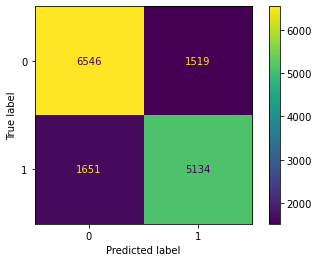

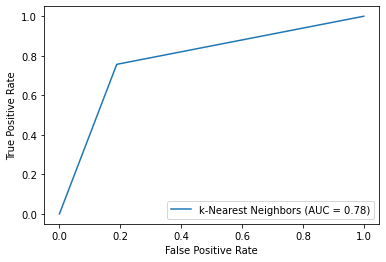

In [24]:
# Print out validation metrics
print('='*40)
print(f'Validation recall score: {knn_grid_model.best_score_}')
print(f'Validation accuracy score: {knn_accuracy[0][:].max()}')
print(f'Best paramets: {knn_grid_model.best_params_}')
print('='*40)

# Predict for X_test samples
knn_y_test_pred = knn_grid_model.predict(X_test)
knn_recall = recall_score(y_test,knn_y_test_pred)
knn_accuracy = accuracy_score(y_test,knn_y_test_pred)
print(f'Test recall score: {knn_recall}\nTest accuracy score: {knn_accuracy}')

# Diplay confusion matrix and ROC curve for test samples 
print(confusion_matrix(y_test,knn_y_test_pred))
plot_confusion_matrix(knn_grid_model,X_test,y_test);
plot_roc_curve(y_test,knn_y_test_pred,'k-Nearest Neighbors')

In [30]:
# Create model Pipe for RandomForestClassifier
start = time.time()
rfc_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('rfc_model',RandomForestClassifier())])

# Specify parameters rfc_model_pipe GridSearch and incorpoare 
# rfc_model pipe into GridSearchCV
rfc_parameters = {
    'rfc_model__max_samples' : [0.3,0.5],
    'rfc_model__max_features' : ['sqrt','log2'],
    'rfc_model__random_state' : [123],
    'rfc_model__max_depth' : [30,60]
}

rfc_grid_model = GridSearchCV(estimator = rfc_model_pipe,
                          param_grid=rfc_parameters,refit='recall',
                          scoring=['recall','accuracy'])

# Fit train data into rfc_grid_model
rfc_grid_model.fit(X_train,y_train)
rfc_cv_results = pd.DataFrame([rfc_grid_model.cv_results_])
rfc_accuracy = rfc_cv_results['mean_test_accuracy']
stop = time.time()
print('Time to run this rfc_grid_model and grid: {stop-start}')

Fit to rfc_grid_model and grid search complete


Validation recall score: 0.758989792673175
Validation accuracy score: 0.8192368125701458
Best paramets: {'rfc_model__max_depth': 60, 'rfc_model__max_features': 'log2', 'rfc_model__max_samples': 0.5, 'rfc_model__random_state': 123}
Test recall score: 0.7674281503316138
Test accuracy score: 0.8286868686868687
[[7099  966]
 [1578 5207]]


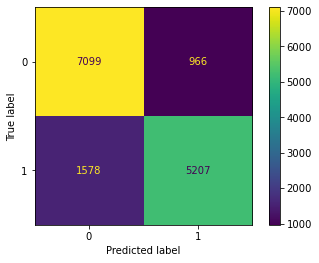

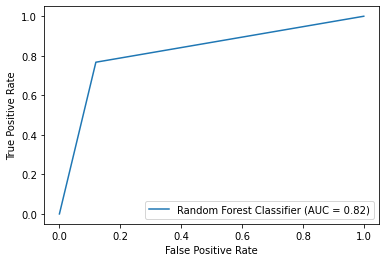

In [34]:
# Print out validation metrics
print('='*40)
print(f'Validation recall score: {rfc_grid_model.best_score_}')
print(f'Validation accuracy score: {rfc_accuracy[0][:].max()}')
print(f'Best paramets: {rfc_grid_model.best_params_}')
print('='*40)

# Prediction for test samples
rfc_y_test_pred = rfc_grid_model.predict(X_test)
rfc_recall = recall_score(y_test,rfc_y_test_pred)
rfc_accuracy = accuracy_score(y_test,rfc_y_test_pred)
print(f'Test recall score: {rfc_recall}\nTest accuracy score: {rfc_accuracy}')

# Display confusion matrix and and ROC curve for test samples
print(confusion_matrix(y_test,rfc_y_test_pred))
plot_confusion_matrix(rfc_grid_model,X_test,y_test);
plot_roc_curve(y_test,rfc_y_test_pred,'Random Forest Classifier')

In [37]:
# Instantiate DecisionTreeClassifier and KNeighbors estimater with specified 
# parameters and then instantiate VotingClassifier and incoporate decision tree
# knn estimators into it
start = time.time()
dctree = DecisionTreeClassifier(random_state=1234,max_depth=60,
                                max_features='auto')

knneighbor = KNeighborsClassifier(n_neighbors=3, leaf_size=15,weights='distance')

vc_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('vc_model',VotingClassifier(estimators=[
        ('dctree',dctree),('knneighbor',knneighbor)]))])

# Specify parameters for vc_model and incorporate into GridSearch
vc_parameters = {
    'vc_model__voting' : ['soft'],
    'vc_model__weights': [[0.4,0.6],[0.2,0.8]]
}


vc_grid_model = GridSearchCV(estimator = vc_model_pipe,
                          param_grid=vc_parameters,refit='recall',
                          scoring=['recall','accuracy'])

# Fit train data into vc_grid_model
vc_grid_model.fit(X_train,y_train)

# Incorparate validation results into dataframe
vc_cv_results = pd.DataFrame([vc_grid_model.cv_results_])
vc_accuracy = vc_cv_results['mean_test_accuracy']
stop = time.time()
print(f'Time to run this vc_model grid: {stop-start}')

Time to run this vc_model grid: 134.74619912299977


Validation recall score: 0.7560421984239475
Validation accuracy score: 0.78996632996633
Best paramets: {'vc_model__voting': 'soft', 'vc_model__weights': [0.4, 0.6]}
Test recall score: 0.7700810611643331
Test accuracy score: 0.8014141414141415
[[6676 1389]
 [1560 5225]]


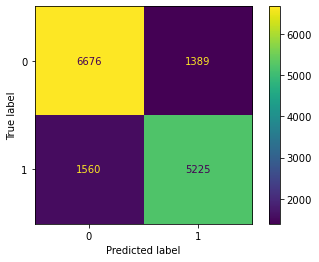

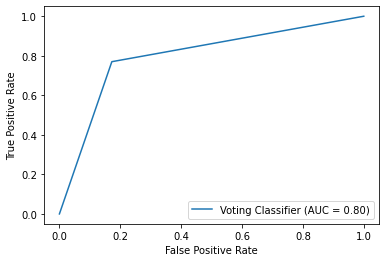

In [38]:
# Display validation metrics
print('='*40)
print(f'Validation recall score: {vc_grid_model.best_score_}')
print(f'Validation accuracy score: {vc_accuracy[0][:].mean()}')
print(f'Best paramets: {vc_grid_model.best_params_}')
print('='*40)

# Prediction for test samples
vc_y_test_pred = vc_grid_model.predict(X_test)
vc_recall = recall_score(y_test,vc_y_test_pred)
vc_accuracy = accuracy_score(y_test,vc_y_test_pred)
print(f'Test recall score: {vc_recall}\nTest accuracy score: {vc_accuracy}')

# Plot confusion matrix and ROC cuve for test samples
print(confusion_matrix(y_test,vc_y_test_pred))
plot_confusion_matrix(vc_grid_model,X_test,y_test);
plot_roc_curve(y_test,vc_y_test_pred,'Voting Classifier')

In [25]:
# Create model Pipe for XGBClassifier
start = time.time()
xgb_model_pipe = Pipeline(steps=[
    ('trans',trans),
    ('xgb_model',xgb.XGBClassifier())])

# Specify grid parameters for xgb_model and incorporate into GridSearch
xgb_parameters = {
    'xgb_model__random_state' : [123],
    #'xgb_model__booster' : [None,'gbtree','gblinear'], gives warnings
    'xgb_model__max_depth' : [30],  #tried 15 and 45
    'xgb_model__tree_method' : ['auto',] #tried 'approx'
}

xgb_grid_model = GridSearchCV(estimator = xgb_model_pipe,
                          param_grid=xgb_parameters,refit='recall',
                          scoring=['recall','accuracy'])

# Fit model on training data
xgb_grid_model.fit(X_train,y_train)
xgb_cv_results = pd.DataFrame([xgb_grid_model.cv_results_])
xgb_val_accuracy = xgb_cv_results['mean_test_accuracy']
stop = time.time()
print(f'Time to run this xgbClassifier grid: {stop-start}')

[20:21:34] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_depth, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_depth, tree_method } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[20:21:46] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { max_depth, tree_method } might not be used.

  This may not be accurate due to so

Validation recall score: 0.7671446992696919
Validation accuracy score: 0.812233445566779
Best paramets: {'xgb_model__booster': None, 'xgb_model__max_depth': 30, 'xgb_model__random_state': 123, 'xgb_model__tree_method': 'auto'}
Test recall score: 0.7793662490788504
Test accuracy score: 0.823030303030303
[[6934 1131]
 [1497 5288]]


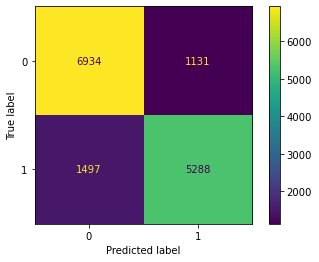

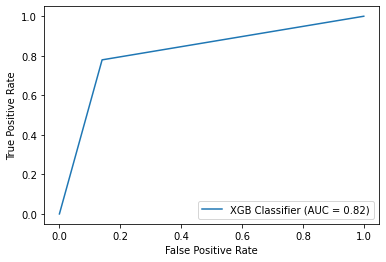

In [26]:
# Display validation results
print('='*40)
print(f'Validation recall score: {xgb_grid_model.best_score_}')
print(f'Validation accuracy score: {xgb_val_accuracy[0][:].max()}')
print(f'Best paramets: {xgb_grid_model.best_params_}')
print('='*40)

# Prediction for test samples
xgb_y_test_pred = xgb_grid_model.predict(X_test)
xgb_recall = recall_score(y_test,xgb_y_test_pred)
xgb_accuracy = accuracy_score(y_test,xgb_y_test_pred)
print(f'Test recall score: {xgb_recall}\nTest accuracy score: {xgb_accuracy}')

# Display confusion matrix and ROC curve for test samples
print(confusion_matrix(y_test,xgb_y_test_pred))
plot_confusion_matrix(xgb_grid_model,X_test,y_test);
plot_roc_curve(y_test,xgb_y_test_pred,'XGB Classifier')
# Test recall 0.77936, test accuracy 0.823030
# Best params: max_depth': 30, tree_method': 'auto'

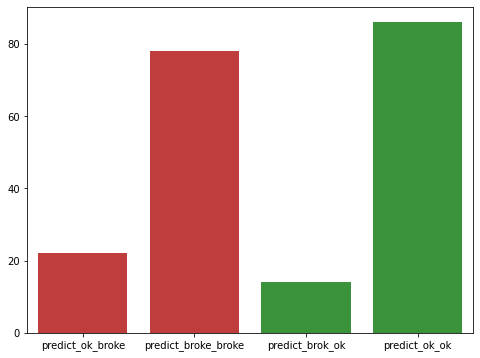

In [245]:

matrix = [6934, 1131,1497, 5288]
samples = sum(matrix)


ok = matrix[0:2]
predict_brok_ok =  np.array(ok[1])/sum(ok)*100
predict_ok_ok = np.array(ok[0])/sum(ok)*100

broken = matrix[2:4]
predict_ok_brok = np.array(broken[0])/sum(broken)*100
predict_brok_brok = np.array(broken[1])/sum(broken)*100

a = pd.Series({'predict_ok_broke' : [predict_ok_brok]})
b = pd.Series({'predict_broke_broke' : [predict_brok_brok]})
c = pd.Series({'predict_broke_ok': [predict_brok_ok]})
d = pd.Series({'predict_ok_ok' : [predict_ok_ok]})
m = pd.DataFrame([a,b,c,d])

a = pd.DataFrame(confusion_matrix(y_test,xgb_y_test_pred))
b = pd.DataFrame([[predict_ok_brok,predict_brok_brok],
                  [predict_brok_ok,predict_ok_ok]])
x = ['predict_ok_broke','predict_broke_broke',
     'predict_brok_ok','predict_ok_ok']
y = [predict_ok_brok,predict_brok_brok,
    predict_brok_ok,predict_ok_ok]
fig,ax = plt.subplots(figsize=(8,6))
sns.barplot(x=x,y=y,palette = ['tab:red', 'tab:red', 'tab:green', 'tab:green']);

In [86]:
xgboost = xgb.XGBClassifier()


XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [199]:
a=1e3
a

1000.0

In [153]:
a = pd.to_datetime('2022-01-01').toordinal()
print(a)
b = pd.to_datetime('2022').toordinal()
print(b)

738156
738156


In [205]:
import pandas as pd
import numpy as np
data = [(3,5,7), (2,4,6),(5,8,9)]
df = pd.DataFrame(data, columns = ['A','B','C'])
print(df)


   A  B  C
0  3  5  7
1  2  4  6
2  5  8  9


In [207]:
df2 = df.apply(lambda x: np.square(x) if x.name in ['A'] else x)
df2

,A,B,C
0,9,5,7
1,4,4,6
2,25,8,9


In [270]:
df['D'] = df[['A','B']].apply(lambda x: x)
df

,A,B,C,D
0,3,5,7,3
1,2,4,6,2
2,5,8,9,5


In [271]:
# importing pandas library
import pandas as pd
  
# creating and initializing a list
values= [['Rohan',455],['Elvish',250],['Deepak',495],
         ['Soni',400],['Radhika',350],['Vansh',450]]

# creating a pandas dataframe
df = pd.DataFrame(values,columns=['Name','Total_Marks'])

df

,Name,Total_Marks
0,Rohan,455
1,Elvish,250
2,Deepak,495
3,Soni,400
4,Radhika,350
5,Vansh,450


In [284]:

 

 
# Applying lambda function to find
# percentage of 'Total_Marks' column
# using df.assign()
df = df.assign(Product=lambda x: (x['Total_Marks'] /500 * 100))
 
# displaying the data frame
df

KeyError: 'Total_Marks'

In [276]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np

# creating and initializing a nested list
values_list = [[1.5, 2.5, 10.0], [2.0, 4.5, 5.0], [2.5, 5.2, 8.0],
			[4.5, 5.8, 4.8], [4.0, 6.3, 70], [4.1, 6.4, 9.0],
			[5.1, 2.3, 11.1]]

# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
				index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df

,Field_1,Field_2,Field_3
a,1.5,2.5,10.0
b,2.0,4.5,5.0
c,2.5,5.2,8.0
d,4.5,5.8,4.8
e,4.0,6.3,70.0
f,4.1,6.4,9.0
g,5.1,2.3,11.1


In [7]:
# importing pandas and numpylibraries
import pandas as pd
import numpy as np

# creating and initializing a nested list
values_list = [[1.5, 2.5, 10.0], [2.0, 4.5, 5.0], [2.5, 5.2, 8.0],
			[4.5, 5.8, 4.8], [4.0, 6.3, 70], [4.1, 6.4, 9.0],
			[5.1, 2.3, 11.1]]

# creating a pandas dataframe
df = pd.DataFrame(values_list, columns=['Field_1', 'Field_2', 'Field_3'],
				index=['a', 'b', 'c', 'd', 'e', 'f', 'g'])

df






,Field_1,Field_2,Field_3
a,1.5,2.5,10.0
b,2.0,4.5,5.0
c,2.5,5.2,8.0
d,4.5,5.8,4.8
e,4.0,6.3,70.0
f,4.1,6.4,9.0
g,5.1,2.3,11.1


In [22]:
# Apply function numpy.square() to square
# the values of 2 rows only i.e. with row
# index name 'b' and 'f' only
df = df.apply(lambda x: np.square(x) if x.name in ['b', 'f'] else x, axis=1)

df


,Field_1,Field_2,Field_3,Product
a,1.50,2.50,10.0,37.5000
b,4.00,20.25,25.0,2025.0000
c,2.50,5.20,8.0,104.0000
d,4.50,5.80,4.8,125.2800
e,4.00,6.30,70.0,1764.0000
f,16.81,40.96,81.0,55771.5456
g,5.10,2.30,11.1,130.2030


In [39]:
df['x'] = df[['Field_1','Field_2']].apply(lambda x: None)
df

,Field_1,Field_2,Field_3,Product,x
a,1.50,2.50,10.0,37.5000,NaN
b,4.00,20.25,25.0,2025.0000,NaN
c,2.50,5.20,8.0,104.0000,NaN
d,4.50,5.80,4.8,125.2800,NaN
e,4.00,6.30,70.0,1764.0000,NaN
f,16.81,40.96,81.0,55771.5456,NaN
g,5.10,2.30,11.1,130.2030,NaN


In [40]:
df.x.fillna(value=(df.Field_3 - 5),inplace=True)
df

,Field_1,Field_2,Field_3,Product,x
a,1.50,2.50,10.0,37.5000,5.0
b,4.00,20.25,25.0,2025.0000,20.0
c,2.50,5.20,8.0,104.0000,3.0
d,4.50,5.80,4.8,125.2800,-0.2
e,4.00,6.30,70.0,1764.0000,65.0
f,16.81,40.96,81.0,55771.5456,76.0
g,5.10,2.30,11.1,130.2030,6.1


In [9]:
# Applying lambda function to find product of 3 columns
# i.e 'Field_1', 'Field_2' and 'Field_3'
df = df.assign(Product=lambda x: (x['Field_1'] * x['Field_2'] * x['Field_3']))
df

,Field_1,Field_2,Field_3,Product
a,1.5,2.5,10.0,37.500
b,2.0,4.5,5.0,45.000
c,2.5,5.2,8.0,104.000
d,4.5,5.8,4.8,125.280
e,4.0,6.3,70.0,1764.000
f,4.1,6.4,9.0,236.160
g,5.1,2.3,11.1,130.203


In [73]:
df_date = pd.DataFrame({'date' : [1923,1948,0,1970,1980,0,1990,2000,2010,2022]})
df_date['rev_date'] = df_date['date'].map(
    lambda x: pd.to_datetime(x,format='%Y').toordinal() if(x>0) else None)
df_date

,date,rev_date
0,1923,701996.0
1,1948,711127.0
2,0,NaN
3,1970,719163.0
4,1980,722815.0
5,0,NaN
6,1990,726468.0
7,2000,730120.0
8,2010,733773.0
9,2022,738156.0


In [81]:
df_date2 = pd.DataFrame({'date' : ['1923','1948','1970','1980','1990',
                                   '2000','2010','2022']})
df_date2['rev_date'] = df_date2['date'].map(lambda x: pd.to_datetime(x).toordinal())
df_date2

,date,rev_date
0,1923,701996
1,1948,711127
2,1970,719163
3,1980,722815
4,1990,726468
5,2000,730120
6,2010,733773
7,2022,738156


In [156]:
a = {'a' : 123, 'b' : 456}
b = pd.DataFrame([a])
b

,a,b
0,123,456
